<a href="https://colab.research.google.com/github/anujshetty/SearchAndResQ/blob/main/Starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from __future__ import unicode_literals
import time

In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython import display

from Gridworld import Gridworld
from utils import visualize_grid, policy_score, simulate_policy, heatmap, plot_scores

from Learning import QLearningModel, EpsilonGreedyExploration, GreedyPolicy, ValueIterationModel


(5, 5, 4, 3, 3, 3, 6)
[2, 4, 1, 0, 0, 0]


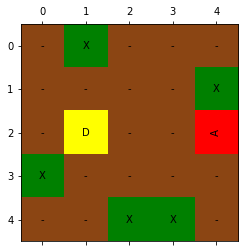

In [5]:
g_rand = Gridworld(gridworld_length=5, gridworld_width=5, num_obstacles=5,
                 collisionReward= -1, destinationReward= 1, defaultReward= -0.1, outOfBoundsReward = -0.1, 
                 failChance= 0.1, gamma= 0.95)
eps_greedy_policy =  EpsilonGreedyExploration(g_rand, 0.6, alpha=0.9)
qlearning_model = QLearningModel(g_rand, 0.2)
print(qlearning_model.Q.shape)
visualize_grid(g_rand)
print(g_rand.state)

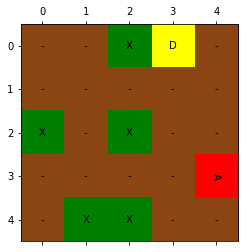

In [46]:
g_rand.reset_position()
visualize_grid(g_rand)

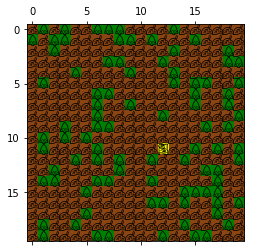

In [ ]:
scores = [] 
for i in range(100000):
    g_rand.reset_position()
    score = simulate_policy(g_rand, model=qlearning_model, policy=eps_greedy_policy, 
                    run_to_completion=False, num_steps=50, visualize=False)
    scores.append(score)
visualize_grid(g_rand)


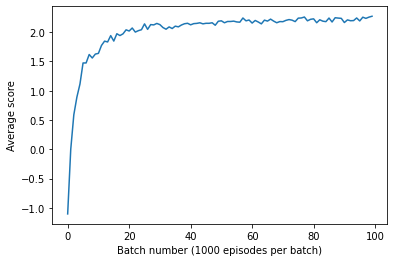

In [ ]:
plot_scores(scores)

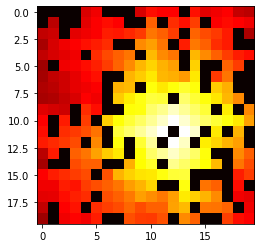

In [ ]:
heatmap(qlearning_model.Q)

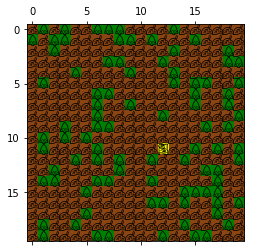

In [ ]:
visualize_grid(g_rand)

In [ ]:
learned_policy = GreedyPolicy(qlearning_model.extract_policy(), g_rand,qlearning_model)
print(learned_policy.policy)

AttributeError: 'QLearningModel' object has no attribute 'extract_policy'

In [40]:
# reset agent position in existing grid
g_rand.reset_position()

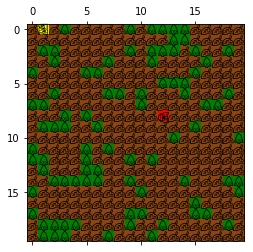

In [ ]:
visualize_grid(g_rand)

33


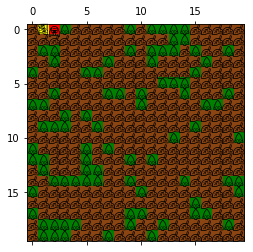

In [ ]:
policy_score_learned = simulate_policy(g_rand, model=None, policy=learned_policy, run_to_completion=True)

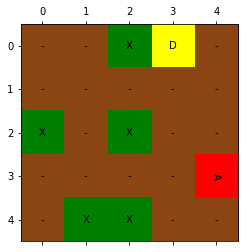

In [47]:
visualize_grid(g_rand)

In [ ]:
print(policy_score_learned)

0.9201295511778791


# Value Iteration

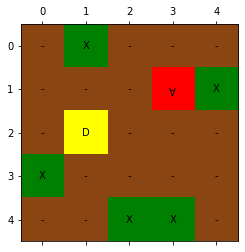

In [6]:
g_rand.reset_position()
visualize_grid(g_rand)

In [7]:
value_model = ValueIterationModel(g_rand, maxIter=1000)
value_model.value_update()

False

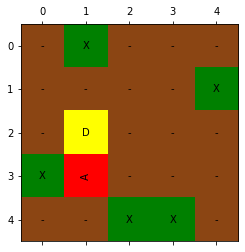

In [8]:

policy_score_learned = simulate_policy(g_rand, model=value_model, policy=GreedyPolicy(g_rand), run_to_completion=True)

In [9]:
U = value_model.U
for i in U:
  for j in i:
    print(j)

[13.40835038 11.49908224 10.75538765 13.39379697]
[13.73796488 14.79862296 14.27153181 13.52044142]
[13.54149313 12.44155924 13.36818057 12.42467305]
[11.016164   11.29612427 11.3205996  12.36582806]
[10.6082988  10.6543369  11.54799833 11.47976024]
[13.62797402 11.50155724 15.61661211 12.63796841]
[14.83694454 16.01125787 13.52729743 15.7425115 ]
[12.74353863 12.36791794 13.58051319 12.50809215]
[10.60829774 10.61248435 12.58592247 11.48371277]
[10.60825644 10.65356871 11.49084615 11.48348601]
[14.97566719 16.01135747 14.75690963 14.84164516]
[14.83477262 15.09076053 16.04764992 15.73412631]
[11.97057006 14.68854268 12.7756522  11.76438812]
[13.55147299 13.63187113 11.62429576 10.80511279]
[10.59789757 10.61301874  9.44346246  9.87379125]
[15.08936924 15.4236792  16.24433099 15.94821658]
[15.09326783 15.42367921 16.23534663 14.84510972]
[12.58829275 13.5503105  14.95321823 14.17359878]
[12.51169984 12.64174025 10.92632187 10.25473104]
[11.60407165 12.43003698 10.11747885 11.55419891]


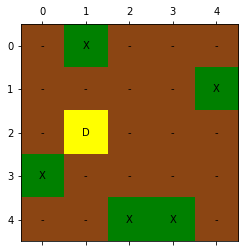

In [10]:
visualize_grid(g_rand)